# [Python 股票分析教學 ：Stocker 強大的股價預測分析工具 (附完整程式碼)](https://weikaiwei.com/python/stocker/ )

## 都會阿嬤 https://weikaiwei.com

# 第零部份 安裝相關套件

In [1]:
!pip install -U quandl numpy pandas matplotlib pystan pytrends plotly yfinance

Requirement already up-to-date: quandl in /home/leonardo/anaconda3/envs/stock/lib/python3.7/site-packages (3.5.0)
Requirement already up-to-date: numpy in /home/leonardo/anaconda3/envs/stock/lib/python3.7/site-packages (1.18.1)
Requirement already up-to-date: pandas in /home/leonardo/anaconda3/envs/stock/lib/python3.7/site-packages (1.0.1)
Requirement already up-to-date: matplotlib in /home/leonardo/anaconda3/envs/stock/lib/python3.7/site-packages (3.1.3)
Requirement already up-to-date: pystan in /home/leonardo/anaconda3/envs/stock/lib/python3.7/site-packages (2.19.1.1)
Requirement already up-to-date: pytrends in /home/leonardo/anaconda3/envs/stock/lib/python3.7/site-packages (4.7.2)
Requirement already up-to-date: plotly in /home/leonardo/anaconda3/envs/stock/lib/python3.7/site-packages (4.5.2)
Requirement already up-to-date: yfinance in /home/leonardo/anaconda3/envs/stock/lib/python3.7/site-packages (0.1.54)


In [2]:
!conda install -c conda-forge fbprophet

Solving environment: done

# All requested packages already installed.



# 第一部份 下載資料 （使用 yfinance）

In [3]:
import pandas as pd
import yfinance as yf

stockNo = "2330.TW"
start_date = '2015-01-01'
df = yf.download(stockNo, start=start_date)
df = df.reset_index()

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-05,140.5,140.5,137.5,139.5,115.836479,32046000
1,2015-01-06,137.5,137.5,133.0,133.5,110.854256,66778000
2,2015-01-07,133.5,135.0,133.5,134.0,111.269455,43703000
3,2015-01-08,136.5,138.0,136.0,138.0,114.590912,42491000
4,2015-01-09,135.0,135.5,133.0,134.0,111.269455,61558000
...,...,...,...,...,...,...,...
1248,2020-02-21,325.5,326.5,323.0,325.0,325.000000,22813534
1249,2020-02-24,319.5,321.5,319.5,320.0,320.000000,41693680
1250,2020-02-25,320.0,323.5,317.5,322.0,322.000000,36195011
1251,2020-02-26,317.0,320.5,316.5,318.5,318.500000,60479362


# 第二部份 使用 Stocker 預測股價

In [5]:
from stocker import Stocker
stock = Stocker(stockNo, df)

stockNo : 2330.TW Stocker Initialized. Data covers 2015-01-05 00:00:00 to 2020-02-27 00:00:00.


## 畫出歷史股價

Maximum Adj. Close = 346.00 on 2020-01-14 00:00:00.
Minimum Adj. Close = 115.00 on 2015-08-24 00:00:00.
Current Adj. Close = 316.00 on 2020-02-27 00:00:00.



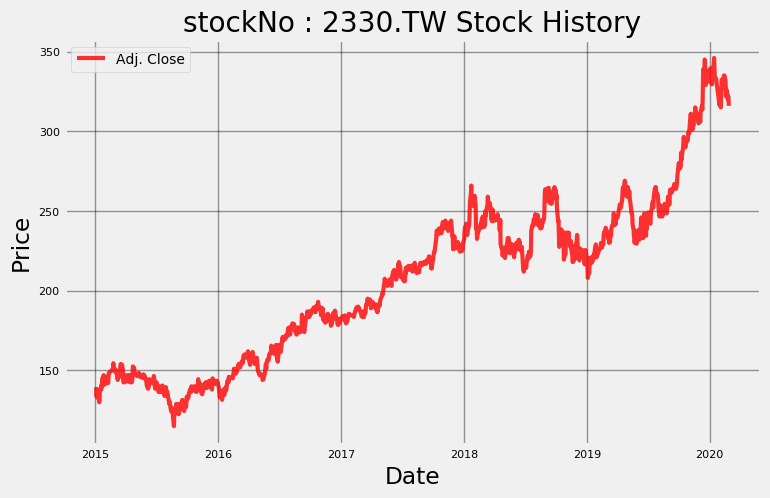

In [6]:
stock.plot_stock()

## 使用 Prophet 預言家模型預測股價

Predicted Price on 2020-03-08 00:00:00 = $347.15


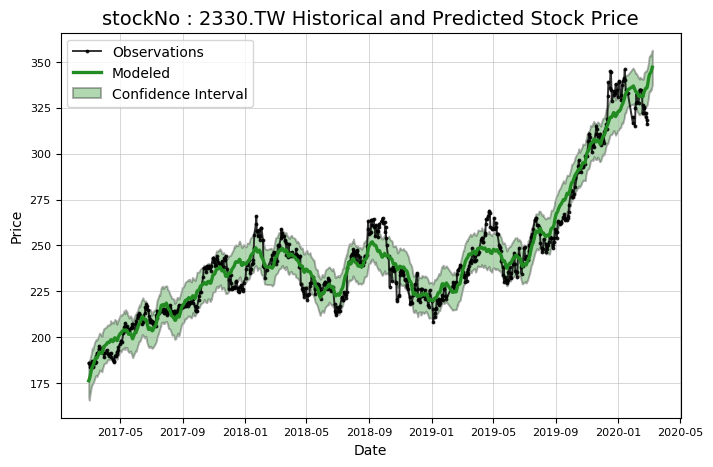

In [7]:
model, model_data = stock.create_prophet_model(days=10)


Prediction Range: 2019-02-27 00:00:00 to 2020-02-27 00:00:00.

Predicted price on 2020-02-26 00:00:00 = $210.49.
Actual price on    2020-02-26 00:00:00 = $318.50.

Average Absolute Error on Training Data = $5.16.
Average Absolute Error on Testing  Data = $57.20.

When the model predicted an increase, the price increased 48.25% of the time.
When the model predicted a  decrease, the price decreased  42.06% of the time.

The actual value was within the 80% confidence interval 0.83% of the time.


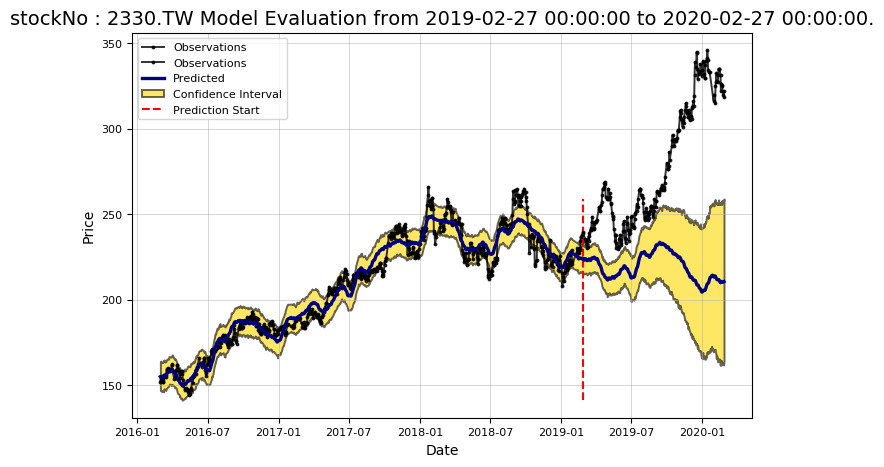

In [8]:
stock.evaluate_prediction()

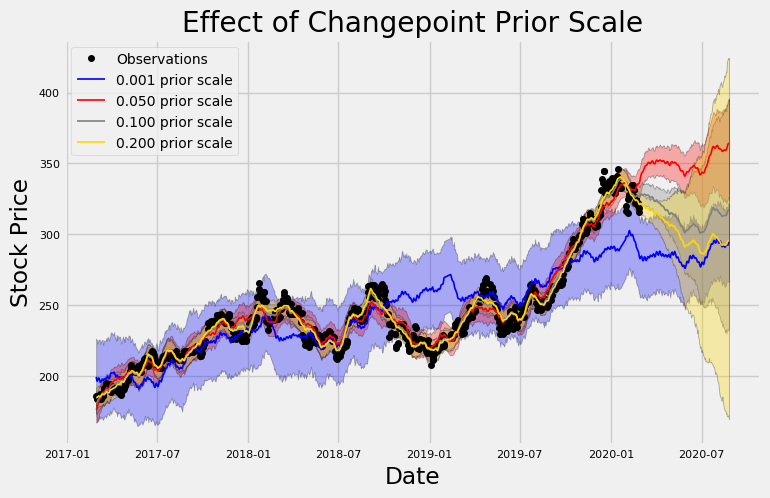

In [9]:
stock.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

In [10]:
stock.changepoint_prior_scale = 0.5


Prediction Range: 2019-02-27 00:00:00 to 2020-02-27 00:00:00.

Predicted price on 2020-02-26 00:00:00 = $292.19.
Actual price on    2020-02-26 00:00:00 = $318.50.

Average Absolute Error on Training Data = $3.36.
Average Absolute Error on Testing  Data = $30.88.

When the model predicted an increase, the price increased 46.94% of the time.
When the model predicted a  decrease, the price decreased  40.86% of the time.

The actual value was within the 80% confidence interval 92.53% of the time.


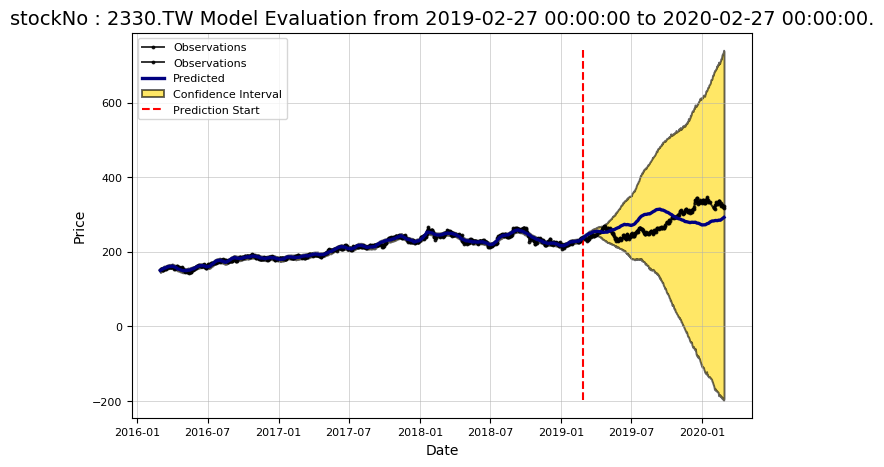

In [11]:
stock.evaluate_prediction()